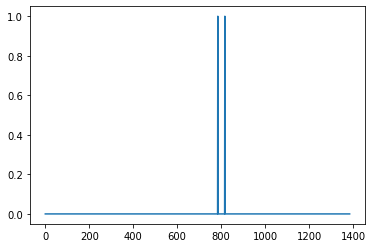

In [3]:
import pandas as pd #to create table in python
import numpy as np  #for array processing
from datetime import date as dt
import re
from matplotlib import pyplot as plt#for nice plots
sizexpixel=0.1 #maximum 4.163
sizeypixel=0.1 #maximum 3.222
numberxpixel=int(np.floor(4.163/sizexpixel)) 
numberypixel=int(np.floor(3.222/sizeypixel))
startlatitude=21.412
startlongitude=119.337

def togrid(data):
    length=np.size(data.loc[:,['time']])
    #print(length)
    start=re.findall("\d+", data.iloc[0,0])
    #print(start)
    end=re.findall("\d+", data.iloc[length-1,0])
    startdate=dt(int(start[0]),int(start[1]),int(start[2]))
    #print(startdate)
    enddate=dt(int(end[0]),int(end[1]),int(end[2]))
    #print(enddate)
    delta=startdate-enddate
    #print(delta.days)
    datagrid2D=np.zeros((delta.days+1,int((numberxpixel+1)*(numberypixel+1))))
    datagrid3D=np.zeros((delta.days+1,int((numberxpixel+1)*(numberypixel+1)), 14))
    #print((numberxpixel+1)*(numberypixel+1))
    for i in range(length):
        dayx=re.findall("\d+", data.iloc[i,0])
        day=dt(int(dayx[0]), int(dayx[1]), int(dayx[2]))
        latitude=np.floor((data.iloc[i,1]-startlatitude)/sizexpixel)
        longitude=np.floor((data.iloc[i,2]-startlongitude)/sizeypixel)
        datagrid2D[int((startdate-day).days),int(((latitude-1)*(numberypixel))+longitude)]=1
    return datagrid2D#,datagrid3D
train=pd.read_csv('train.csv') #import the csv file in a table
test=pd.read_csv('test.csv')
#print(test.keys())
bild=togrid(train)
plt.plot(bild[4,:])